# Assessment 1 
#### 27 March 2024
##### Elna Kruger (22847340)

In [1]:
# preliminaries
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

## Question 1

In [2]:
#import csv files
d1 = pd.read_csv('A0.5B24.csv', names=['Time', 'NADPH'])
d2 = pd.read_csv('A0B0.csv', names=['Time', 'NADPH'])
d3 = pd.read_csv('A1B24.csv', names=['Time', 'NADPH'])
d4 = pd.read_csv('A2B24.csv', names=['Time', 'NADPH'])
d5 = pd.read_csv('A4B24.csv', names=['Time', 'NADPH'])
d6 = pd.read_csv('A8B1.5.csv', names=['Time', 'NADPH'])
d7 = pd.read_csv('A8B12.csv', names=['Time', 'NADPH'])
d8 = pd.read_csv('A8B24.csv', names=['Time', 'NADPH'])
d9 = pd.read_csv('A8B3.csv', names=['Time', 'NADPH'])
d10 = pd.read_csv('A8B6.csv', names=['Time', 'NADPH'])

In [3]:
d1.tail()

Time     NADPH
6   0.06  0.010109
7   0.07  0.013746
8   0.08  0.022254
9   0.09  0.023450
10  0.10  0.024279

In [4]:
d1 = np.array(d1)
d2 = np.array(d2)
d3 = np.array(d3)
d4 = np.array(d4)
d5 = np.array(d5)
d6 = np.array(d6)
d7 = np.array(d7)
d8 = np.array(d8)
d9 = np.array(d9)
d10 = np.array(d10)
#all csv files data now as arrays

In [5]:
d1

array([[ 0.        , -0.00149074],
       [ 0.01      ,  0.00488466],
       [ 0.02      ,  0.00637035],
       [ 0.03      ,  0.00580822],
       [ 0.04      ,  0.01144171],
       [ 0.05      ,  0.01151883],
       [ 0.06      ,  0.01010901],
       [ 0.07      ,  0.0137459 ],
       [ 0.08      ,  0.02225375],
       [ 0.09      ,  0.02345042],
       [ 0.1       ,  0.02427913]])

In [6]:
#turn arrays into pandas dataframes
df1 = pd.DataFrame(d1, columns=['Time', 'NADPH'])
df2 = pd.DataFrame(d2, columns=['Time', 'NADPH'])
df3 = pd.DataFrame(d3, columns=['Time', 'NADPH'])
df4 = pd.DataFrame(d4, columns=['Time', 'NADPH'])
df5 = pd.DataFrame(d5, columns=['Time', 'NADPH'])
df6 = pd.DataFrame(d6, columns=['Time', 'NADPH'])
df7 = pd.DataFrame(d7, columns=['Time', 'NADPH'])
df8 = pd.DataFrame(d8, columns=['Time', 'NADPH'])
df9 = pd.DataFrame(d9, columns=['Time', 'NADPH'])
df10 = pd.DataFrame(d10, columns=['Time', 'NADPH'])

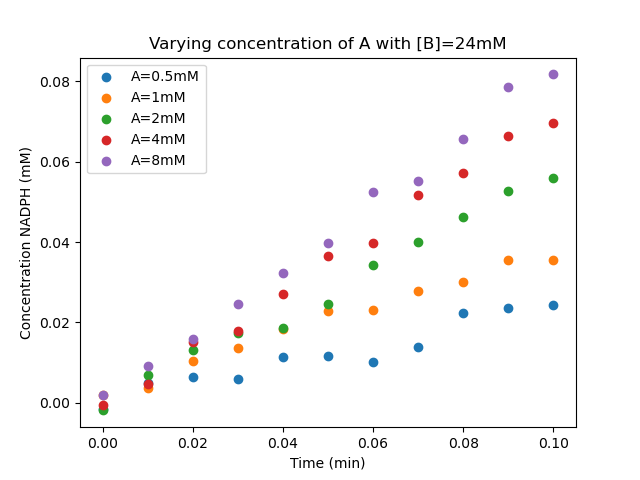

In [8]:
#plot where A was varied and B was 24mM on same graph

fig, ax = plt.subplots()
ax.scatter(df1.Time, df1.NADPH, label='A=0.5mM')
ax.scatter(df3.Time, df3.NADPH, label='A=1mM')
ax.scatter(df4.Time, df4.NADPH, label='A=2mM')
ax.scatter(df5.Time, df5.NADPH, label='A=4mM')
ax.scatter(df8.Time, df8.NADPH, label='A=8mM')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Concentration NADPH (mM)')
ax.set_title('Varying concentration of A with [B]=24mM')
ax.legend()

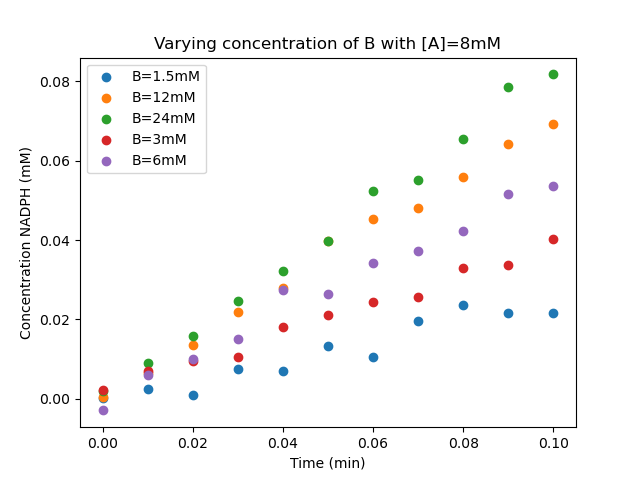

In [9]:
#plot where B was varied and A was 8mM on same graph

fig, ax = plt.subplots()
ax.scatter(df6.Time, df6.NADPH, label='B=1.5mM')
ax.scatter(df7.Time, df7.NADPH, label='B=12mM')
ax.scatter(df8.Time, df8.NADPH, label='B=24mM')
ax.scatter(df9.Time, df9.NADPH, label='B=3mM')
ax.scatter(df10.Time, df10.NADPH, label='B=6mM')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Concentration NADPH (mM)')
ax.set_title('Varying concentration of B with [A]=8mM')
ax.legend()

In [10]:
plt.close('all')

## Question 2


In [11]:
#calculate regressions for each dataset
reg1 = sp.stats.linregress(d1)
reg2 = sp.stats.linregress(d2)
reg3 = sp.stats.linregress(d3)
reg4 = sp.stats.linregress(d4)
reg5 = sp.stats.linregress(d5)
reg6 = sp.stats.linregress(d6)
reg7 = sp.stats.linregress(d7)
reg8 = sp.stats.linregress(d8)
reg9 = sp.stats.linregress(d9)
reg10 = sp.stats.linregress(d10)

In [12]:
#make list of regressions, use to create list of rates
regressions = [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9, reg10]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)

0.24118661159479945
0.004954646341627726
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.25422083243133853
0.7012039804663761
0.8250788434733143
0.3679535702854621
0.556408829374724


In [13]:
#change rates list into an array
rates = np.array(rates)
rates

array([0.24118661, 0.00495465, 0.35263044, 0.57465007, 0.73228566,
       0.25422083, 0.70120398, 0.82507884, 0.36795357, 0.55640883])

## Question 3

In [14]:
#create arrays for A and B concentrations
concs_A = np.array([0.5,0,1,2,4,8,8,8,8,8])
concs_B = np.array([24,0,24,24,24,1.5,12,24,3,6])

In [15]:
#create pd dataframe
concs_rates = pd.DataFrame({'A': concs_A, 'B': concs_B, 'rate': rates}) #concs_rates is a dataframe
concs_rates

A     B      rate
0  0.5  24.0  0.241187
1  0.0   0.0  0.004955
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0   1.5  0.254221
6  8.0  12.0  0.701204
7  8.0  24.0  0.825079
8  8.0   3.0  0.367954
9  8.0   6.0  0.556409

## Question 4

In [16]:
#fit the data in the dataframe concs_rates to the equation given by v
def v(Vf, Ka, Kb, A, B):
    return (Vf*A*B)/((Ka + A)*(Kb + B))

In [17]:
mymod = Model(v, independent_vars=['A', 'B'])
mypar = mymod.make_params(Vf=1, Ka=1, Kb=1)
myfit = mymod.fit(concs_rates.rate, mypar, A=concs_rates.A, B=concs_rates.B)

In [18]:
myfit

### Estimates for parameters:

Vf = 1.2 mM/min (relative error 3.79%)

Ka = 1.6 mM (relative error 8.41%)

Kb = 4.9 mM (relative error 8.42%)

## Question 5

In [19]:
#create new dataframe where values of B=24
concsA_rates = (concs_rates[concs_rates.B==24])
concsA_rates

A     B      rate
0  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
7  8.0  24.0  0.825079

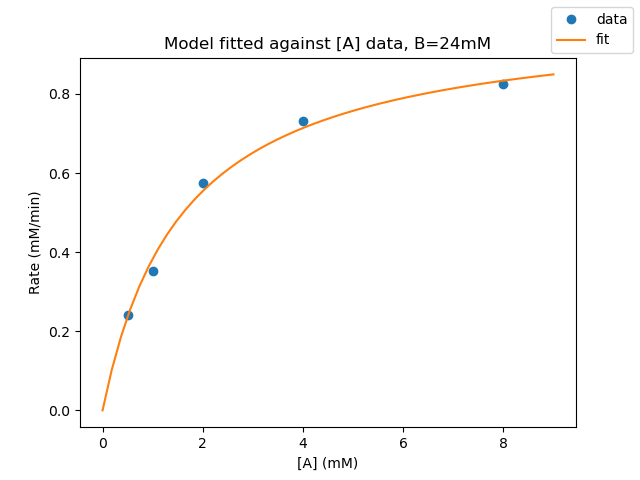

In [20]:
#plot rate vs concentration of A, B fixed at 24

fig, ax = plt.subplots()
ax.plot(concsA_rates.A, concsA_rates.rate, 'o', label='data') #this uses the new pandas dataframe from above

avalues = np.linspace(0,9,50) #specifying range of [A] values from 0 to 9 mM
ax.plot(avalues, myfit.eval(A=avalues, B=24), label='fit') #plotting the fit

ax.set_title('Model fitted against [A] data, B=24mM')         
ax.set_xlabel('[A] (mM)')          
ax.set_ylabel('Rate (mM/min)')
fig.legend()

In [21]:
#create new dataframe where values of A=8
concsB_rates = (concs_rates[concs_rates.A==8])
concsB_rates

A     B      rate
5  8.0   1.5  0.254221
6  8.0  12.0  0.701204
7  8.0  24.0  0.825079
8  8.0   3.0  0.367954
9  8.0   6.0  0.556409

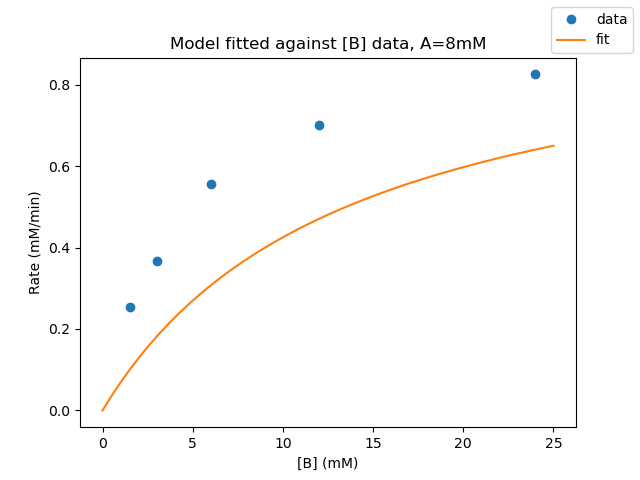

In [22]:
#plot rate vs concentration of B, A fixed at 8

fig, ax = plt.subplots()
ax.plot(concsB_rates.B, concsB_rates.rate, 'o', label='data') #this uses the new pandas dataframe from above

bvalues = np.linspace(0,25,50) #specifying range of [B] values from 0 to 25 mM
ax.plot(bvalues, myfit.eval(B=avalues, A=8), label='fit') #plotting the fit

ax.set_title('Model fitted against [B] data, A=8mM')         
ax.set_xlabel('[B] (mM)')          
ax.set_ylabel('Rate (mM/min)')
fig.legend()